# Heart Disease Data
Source: https://www.kaggle.com/ronitf/heart-disease-uci

# Data Preparation

Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix

Checking the files in the directory that contains the current ipynb file. In my case, it's in "Heart Disease UCI" folder.

In [2]:
import os
print(os.listdir("../Heart Disease UCI"))

['Heart Disease Analysis.ipynb', '.ipynb_checkpoints', 'img', 'heart.csv']


Import the dataset "heart.csv" into pandas dataframe as variable "df"

In [3]:
df = pd.read_csv("../Heart Disease UCI/heart.csv")

Display the imported data

In [4]:
df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

This heart disease data contains 13 attributes:
1. age: Age (years)
2. sex: Sex (1: male, 2: female)
3. cp: Chest Pain Type (0: Typical Angina, 1: Atypical Angina, 2: Non-Anginal Pain, 3: Asymptomatic Pain)
4. trestbps: Resting Blood Pressure (in mm Hg on admission to the hospital)
5. chol: Serum Cholestoral (mg/dl)
6. fbs: Fasting Blood Sugar (>120 mg/dl; 1: true, 0: false)
7. restecg: Resting Electrocardiographic Results (values: 0, 1, 2)
8. thalach: Maximum Heart Rate Achieved
9. exang: Exercise Induced Angina (1: yes, 0: no)
10. oldpeak: Oldpeak (ST depression induced by exercise relative to rest)
11. slope: The Slope of the Peak Exercise ST Segment
12. ca: Number of Major Vessels (0-3) Colored by Flourosopy
13. thal: Thal (3: normal, 6: fixed defect, 7: reversable defect)
14. target: Does the patient has disease (1: yes, 0: no)

# Data Overview

Run basic analysis (count, mean, std, min, max, 25%, 50%, 75%) on the data 

In [5]:
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

Checking the information of the data (type, columns)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Checking for null values (missing data)

In [7]:
print(f"Data Sum of NA values")
df.isnull().sum()
# df.isnull().values.any()

Data Sum of NA values


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Display the correlations of the data

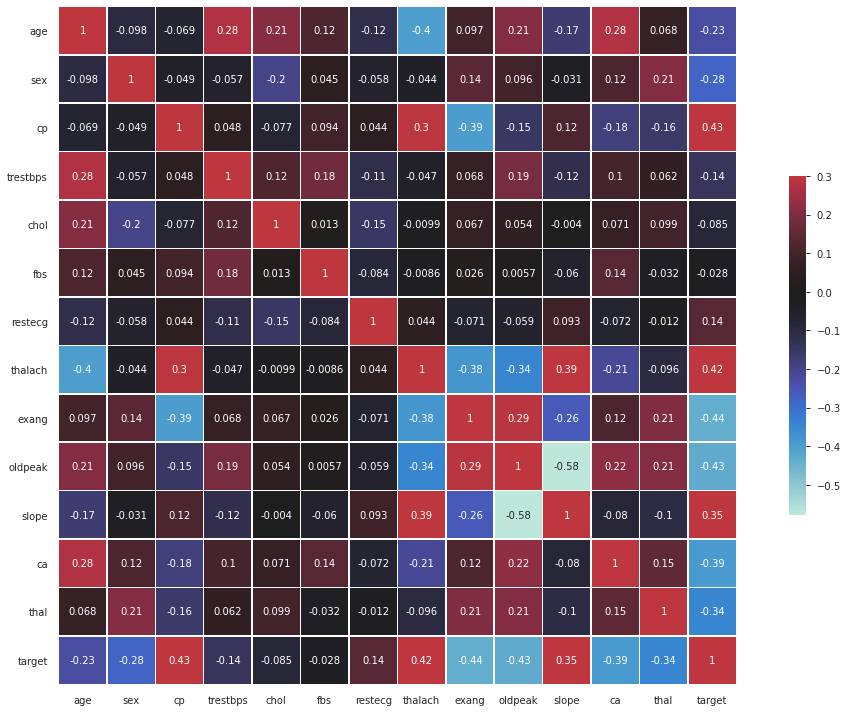

In [8]:
plt.figure(figsize=(15,10))
# sns.heatmap(df.corr(), annot=True, fmt='.2f')
sns.heatmap(df.corr(), vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink":.5}, annot=True)
plt.tight_layout()
plt.show()

Create pairplot for the data

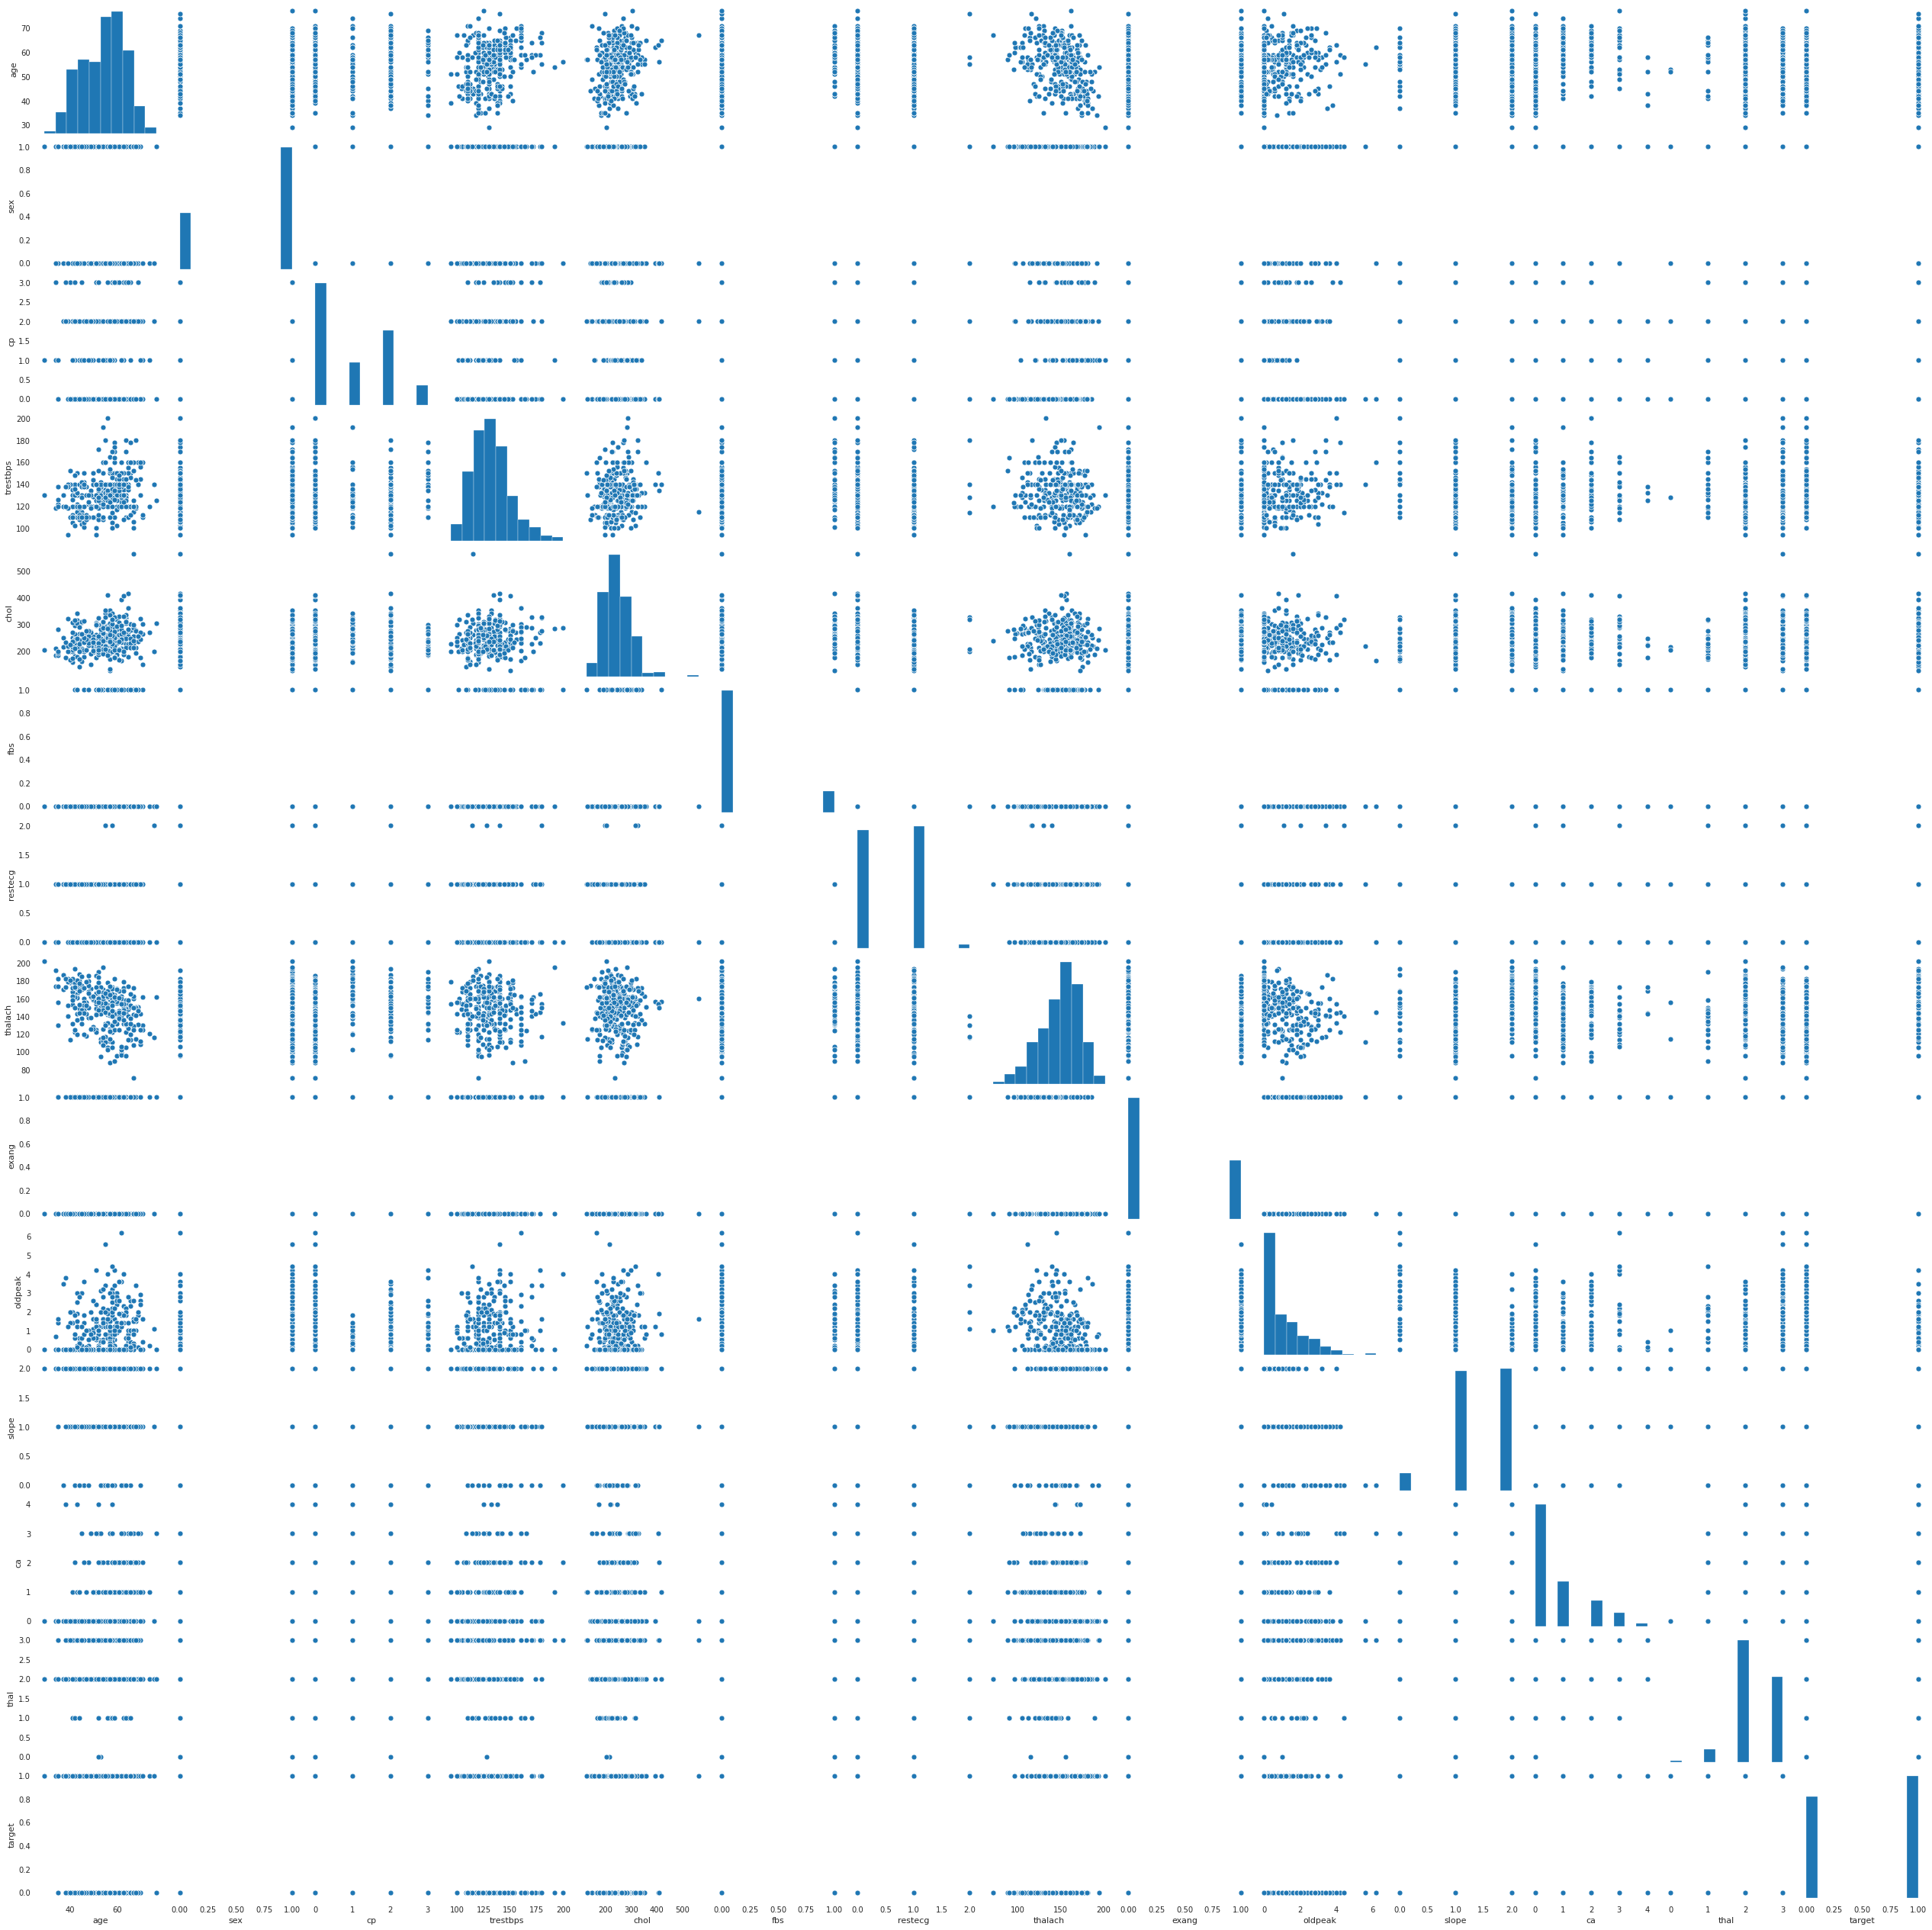

In [9]:
sns.pairplot(df)
plt.show()

In [10]:
pp.ProfileReport(df)

# Age Distribution Analysis

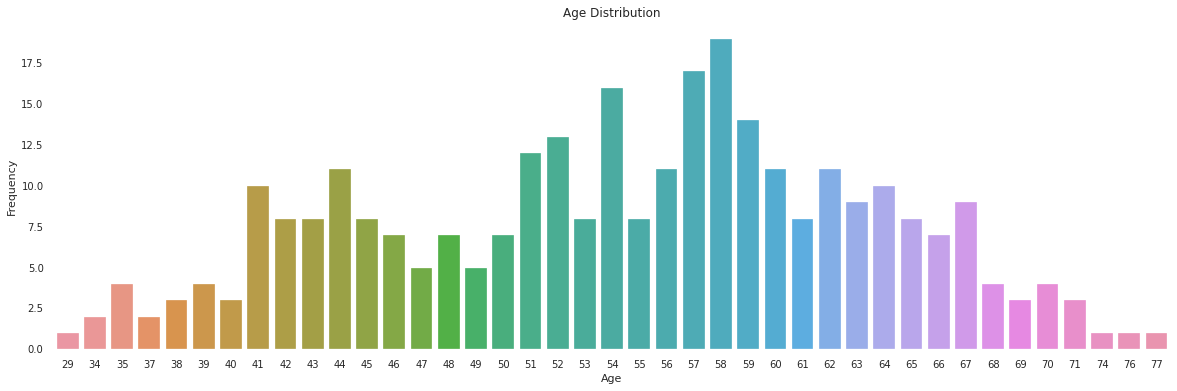

In [11]:
plt.figure(figsize=(20,6))
sns.barplot(x=df.age.value_counts().index, y=df.age.value_counts().values)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

Here, we could see that the minimum age is 29, maximum age is 77

Categorizing the age into group (young age, middle age, elderly age)

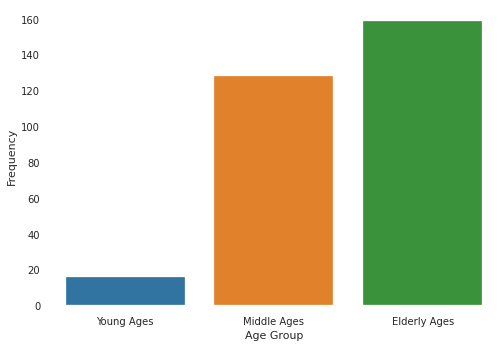

There are 16 young ages, 128 middle ages, and 159 elderly ages


In [12]:
young_age = df[(df.age<40)].index
middle_age = df[(df.age>=40)&(df.age<55)].index
elderly_age = df[(df.age>=55)].index
sns.barplot(x=['Young Ages', 'Middle Ages', 'Elderly Ages'], y=[len(young_age), len(middle_age), len(elderly_age)])
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.show()
print(f"There are {len(young_age)} young ages, {len(middle_age)} middle ages, and {len(elderly_age)} elderly ages")

Create indexes for these group and add them into the dataframe

In [13]:
df['age_group']=0
for index in young_age:
    df.loc[index, 'age_group']=0
for index in middle_age:
    df.loc[index, 'age_group']=1
for index in elderly_age:
    df.loc[index, 'age_group']=2

Plot the categorical scatter plot

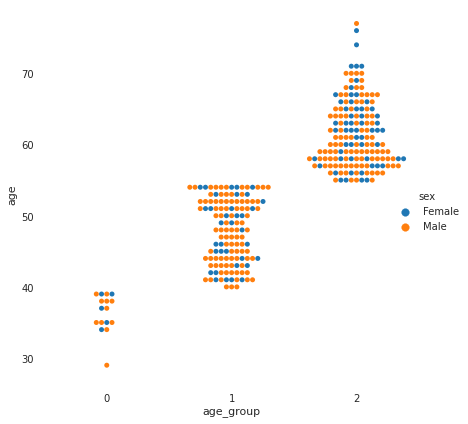

In [14]:
g = sns.catplot(x='age_group', y='age', hue='sex', data=df, kind='swarm', height=6, aspect=1)
labels = ['Female', 'Male']
for t, l in zip(g._legend.texts, labels): t.set_text(l)
plt.show()

Plot the pie chart on the distribution of different age group

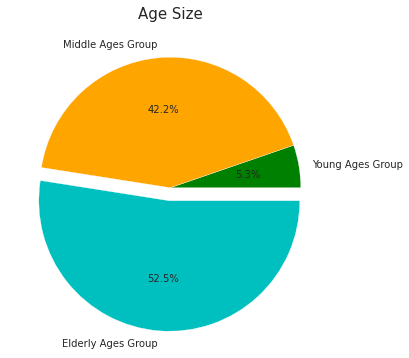

In [15]:
colors = ['g', 'orange', 'c']
plt.figure(figsize=(20,6))
explode = [0, 0, 0.1]
plt.pie([len(young_age),len(middle_age),len(elderly_age)], labels=['Young Ages Group','Middle Ages Group','Elderly Ages Group'], explode=explode, colors=colors, autopct='%1.1f%%')
plt.title('Age Size', fontsize = 15)
plt.show()

Checking for heart disease within young age group

Young ages without disease: 4
Young ages with disease: 12


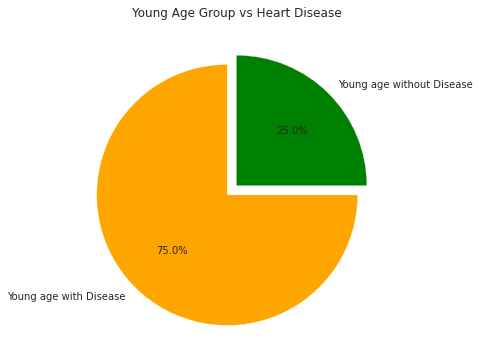

In [16]:
young_wodisease = len(df[(df.target == 0)&(df.age_group == 0)])
young_wdisease = len(df[(df.target == 1)&(df.age_group == 0)])
print(f"Young ages without disease: {young_wodisease}")
print(f"Young ages with disease: {young_wdisease}")
colors = ['green', 'orange']
explode = [0, 0.1]
plt.figure(figsize=(20,6))
plt.pie([young_wodisease, young_wdisease], labels=['Young age without Disease', 'Young age with Disease'], explode = explode, colors = colors, autopct='%1.1f%%')
plt.title('Young Age Group vs Heart Disease')
plt.show()

Checking for heart disease within middle age group

Middle ages without disease: 40
Middle ages with disease: 88


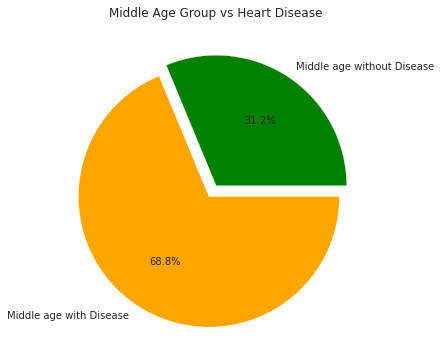

In [17]:
middle_wodisease = len(df[(df.target == 0)&(df.age_group == 1)])
middle_wdisease = len(df[(df.target == 1)&(df.age_group == 1)])
print(f"Middle ages without disease: {middle_wodisease}")
print(f"Middle ages with disease: {middle_wdisease}")
colors = ['green', 'orange']
explode = [0, 0.1]
plt.figure(figsize=(20,6))
plt.pie([middle_wodisease, middle_wdisease], labels=['Middle age without Disease', 'Middle age with Disease'], explode = explode, colors = colors, autopct='%1.1f%%')
plt.title('Middle Age Group vs Heart Disease')
plt.show()

Checking for heart disease within elderly age group

Elderly ages without disease: 94
Elderly ages with disease: 65


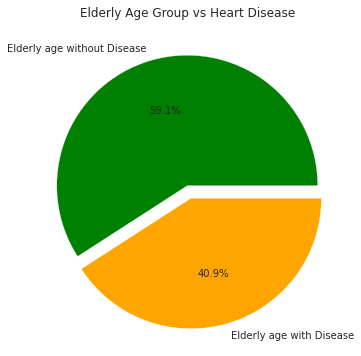

In [18]:
elderly_wodisease = len(df[(df.target == 0)&(df.age_group == 2)])
elderly_wdisease = len(df[(df.target == 1)&(df.age_group == 2)])
print(f"Elderly ages without disease: {elderly_wodisease}")
print(f"Elderly ages with disease: {elderly_wdisease}")
colors = ['green', 'orange']
explode = [0, 0.1]
plt.figure(figsize=(20,6))
plt.pie([elderly_wodisease, elderly_wdisease], labels=['Elderly age without Disease', 'Elderly age with Disease'], explode = explode, colors = colors, autopct='%1.1f%%')
plt.title('Elderly Age Group vs Heart Disease')
plt.show()

Analyze Age vs Heart Disease

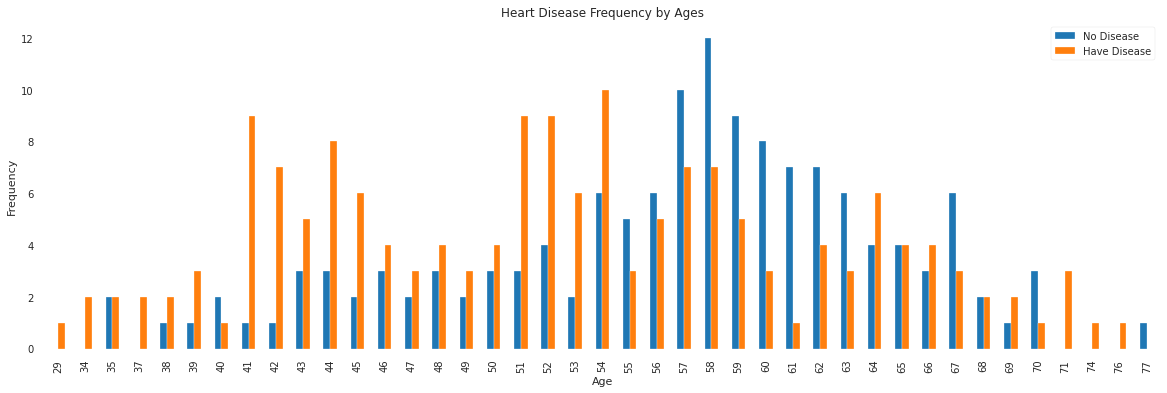

In [19]:
pd.crosstab(df.age, df.target).plot(kind="bar", figsize=(20,6))
plt.title("Heart Disease Frequency by Ages")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend(['No Disease', 'Have Disease'])
# plt.savefig("img/heartDiseaseByAge.jpg")
plt.show()

Here, we could see that most of the patients with heart disease are more observed around age 41~54. 

# Maximum Heart Rate Analysis

Checking Thalach distribution in the data

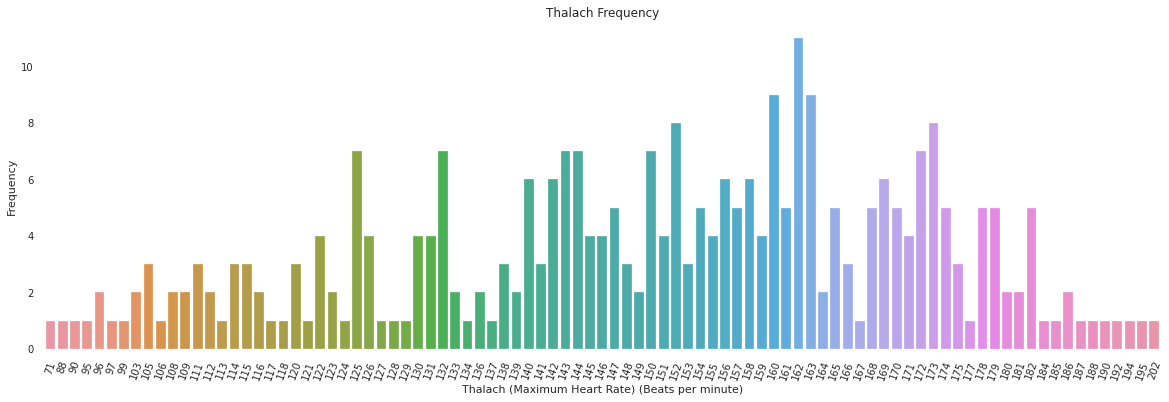

In [20]:
plt.figure(figsize=(20,6))
sns.barplot(x=df.thalach.value_counts().index,y=df.thalach.value_counts().values)
plt.xlabel('Thalach (Maximum Heart Rate) (Beats per minute)')
plt.ylabel('Frequency')
plt.title('Thalach Frequency')
plt.xticks(rotation=70)
plt.show()

Checking Thalach vs Age

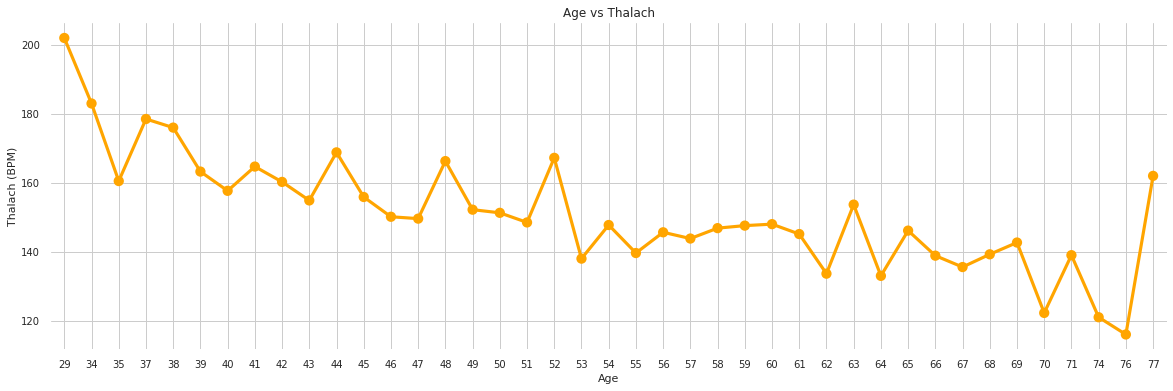

In [21]:
age_list = sorted(df.age.unique())
total_thalach_per_age = df.groupby('age')['thalach'].count().values
age_thalach = []
for i, age in enumerate(age_list):
    age_thalach.append(sum(df[df['age']==age].thalach)/total_thalach_per_age[i])
plt.figure(figsize=(20,6))
sns.pointplot(x=age_list, y=age_thalach, color='orange', alpha=0.8)
plt.xlabel('Age')
plt.xticks(rotation=0)
plt.ylabel('Thalach (BPM)')
plt.title('Age vs Thalach')
plt.grid()
plt.show()

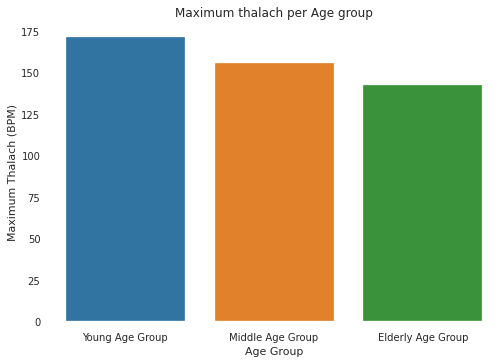

In [22]:
sns.barplot(x=["Young Age Group", "Middle Age Group", "Elderly Age Group"], y=df.groupby('age_group')['thalach'].mean().values)
plt.xlabel('Age Group')
plt.ylabel('Maximum Thalach (BPM)')
plt.title('Maximum thalach per Age group')
plt.show()

From the above 2 figures, we could see that, as people age, their thalach tends to decrease. However, in this data, there is abnomality at age of 77, since there is a shape rise in thalach.

Analyze Age vs Maximum Heart Rate

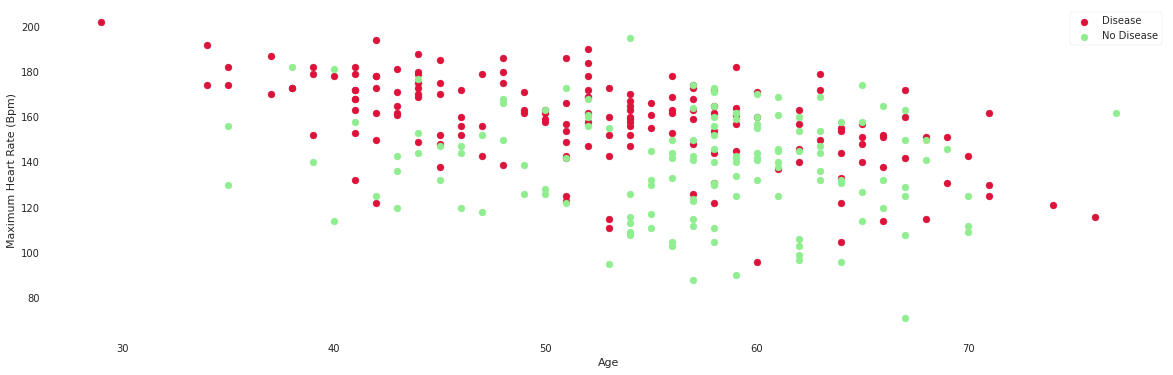

In [23]:
plt.figure(figsize=(20,6))
plt.scatter(x=df.age[df.target == 1], y=df.thalach[df.target == 1], c="crimson")
plt.scatter(x=df.age[df.target == 0], y=df.thalach[df.target == 0], c="lightgreen")
plt.legend(["Disease", "No Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate (Bpm)")
plt.show()

Here, we could see that patients with heart disease are generally younger people of age 40 - 55 with higher heart rate of above 140 beats per minute.

# Gender Distribution Analysis

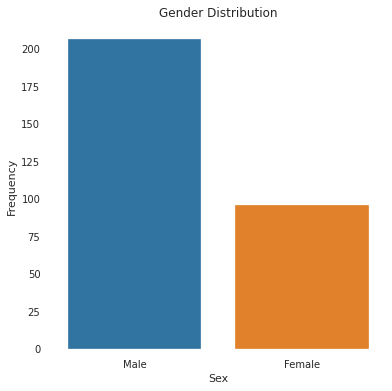

In [24]:
plt.figure(figsize=(6,6))
sns.barplot(x=['Male', 'Female'], y=df.sex.value_counts().values)
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.title('Gender Distribution')
plt.show()

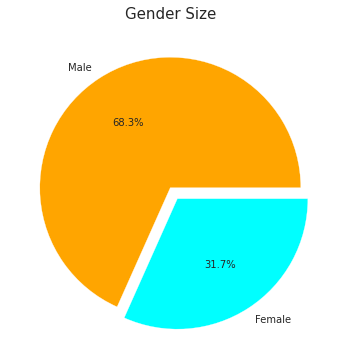

In [25]:
colors = ['orange', 'cyan']
plt.figure(figsize=(20,6))
explode = [0, 0.1]
plt.pie([len(df[df.sex == 1]), len(df[df.sex == 0])], labels=['Male','Female'], explode=explode, colors=colors, autopct='%1.1f%%')
plt.title('Gender Size', fontsize = 15)
plt.show()

Analyze gender vs heart disease

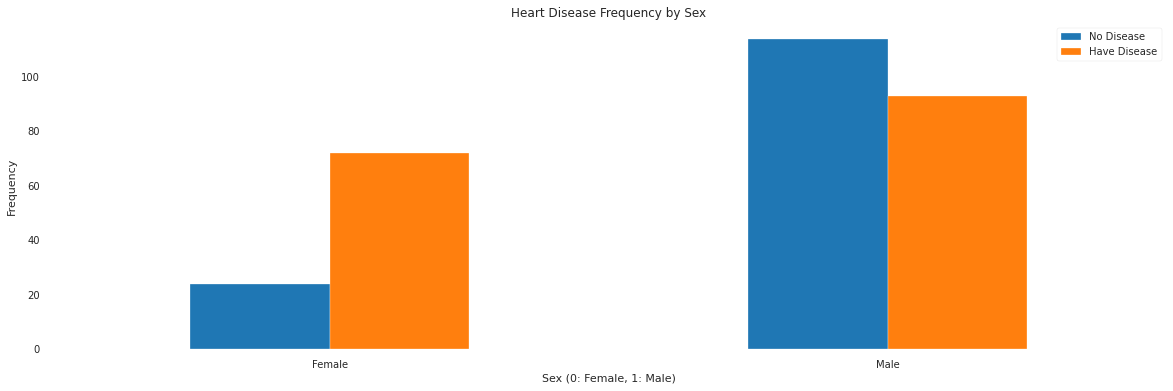

In [26]:
pd.crosstab(df.sex, df.target).plot(kind="bar", figsize=(20,6))
plt.title('Heart Disease Frequency by Sex')
plt.xlabel('Sex (0: Female, 1: Male)')
plt.ylabel('Frequency')
labels = ("Female", "Male")
y_pos = np.arange(len(labels))
plt.xticks(y_pos, labels, rotation=0)
plt.legend(['No Disease', 'Have Disease'])
plt.show()

Here, we could see that female has higher chances of having heart disease than men, eventhough in this tested sample, more male are seen having heart disease than female. 

# Chest Pain Analysis

Checking the distribution of chest pain patients

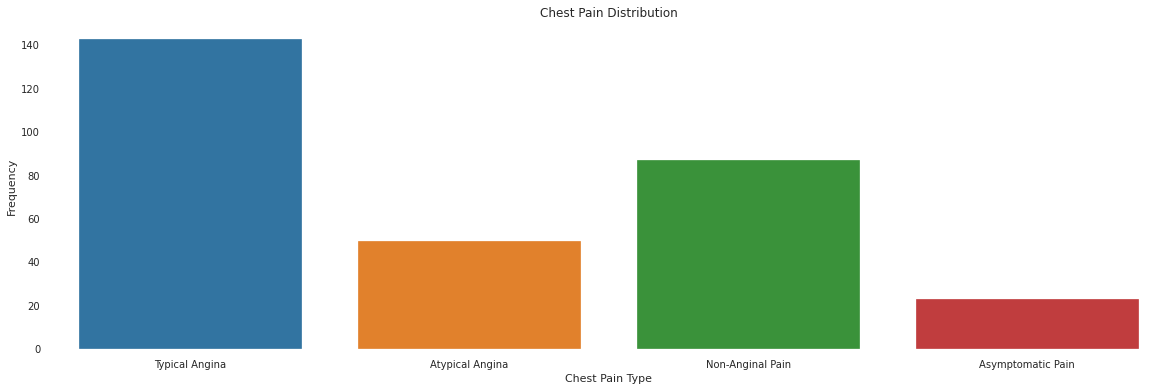

In [27]:
plt.figure(figsize=(20,6))
sns.countplot(df.cp)
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.title("Chest Pain Distribution")
labels = ("Typical Angina", "Atypical Angina", "Non-Anginal Pain", "Asymptomatic Pain")
y_pos = np.arange(len(labels))
plt.xticks(y_pos, labels, rotation=0)
plt.show()

Here, we could see that chest pain is mostly typical angina (type = 0), followed by non-angina (type = 2), then atypical angina (type = 1), and the least is the asymptomatic pain (type = 3)

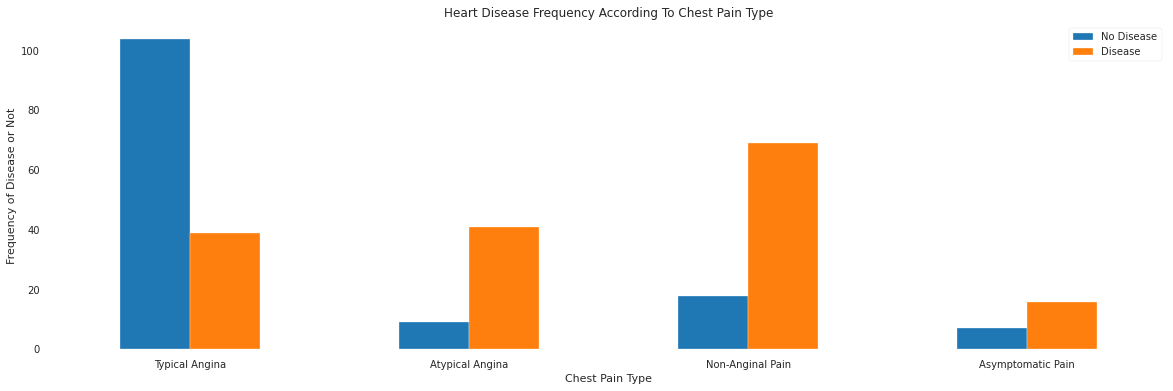

In [28]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.legend(["No Disease", "Disease"])
labels = ("Typical Angina", "Atypical Angina", "Non-Anginal Pain", "Asymptomatic Pain")
y_pos = np.arange(len(labels))
plt.xticks(y_pos, labels, rotation=0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

Here, we could see that out of all the tested case, typical angina chest pain (type 0) is less common in the diagnosis of heart disease. However, we could see that those who have non-anginal pain, atypical angina, and asymptomatic chest pain (type 1, 2, and 3) would likely be diagnose with heart disease.

# Fasting Blood Sugar Analysis

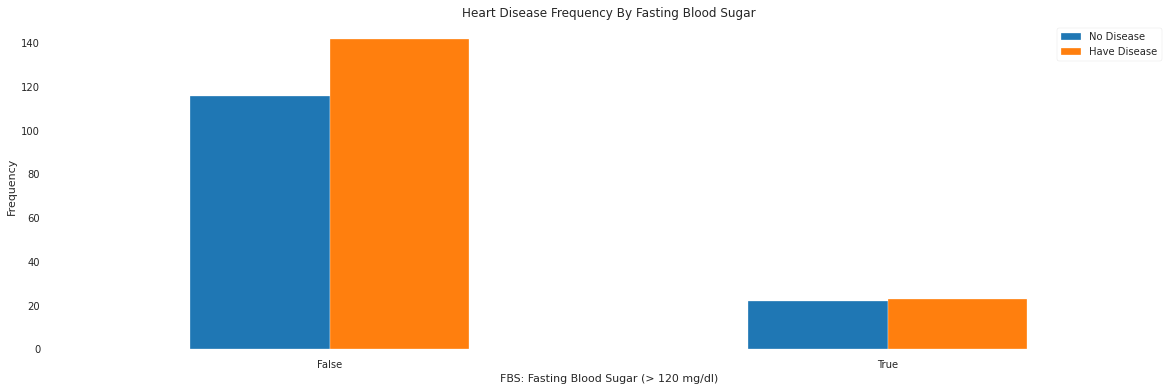

In [29]:
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency By Fasting Blood Sugar')
plt.xlabel('FBS: Fasting Blood Sugar (> 120 mg/dl)')
labels = ("False", "True")
y_pos = np.arange(len(labels))
plt.xticks(y_pos, labels, rotation=0)
plt.legend(["No Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

Here, we could see that people with lower fasting blood sugar will have higher tendency to have heart disease than those with higher fasting blood sugar.

# Data Preprocessing

Transformed the categorical variables 'cp', 'thal', and 'slope' into dummy variables, so we can work with it.

In [30]:
x = pd.get_dummies(df['cp'], prefix = "cp")
y = pd.get_dummies(df['thal'], prefix = "thal")
z = pd.get_dummies(df['slope'], prefix = "slope")

Concatenate the original data with the newly created dummy variables

In [31]:
data_list = [df, x, y, z]
df = pd.concat(data_list, axis = 1)
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  ...  \
0   63    1   3       145   233    1        0      150      0      2.3  ...   
1   37    1   2       130   250    0        1      187      0      3.5  ...   
2   41    0   1       130   204    0        0      172      0      1.4  ...   
3   56    1   1       120   236    0        1      178      0      0.8  ...   
4   57    0   0       120   354    0        1      163      1      0.6  ...   

   cp_1  cp_2  cp_3  thal_0  thal_1  thal_2  thal_3  slope_0  slope_1  slope_2  
0     0     0     1       0       1       0       0        1        0        0  
1     0     1     0       0       0       1       0        1        0        0  
2     1     0     0       0       0       1       0        0        0        1  
3     1     0     0       0       0       1       0        0        0        1  
4     0     0     0       0       0       1       0        0        0        1  

[5 rows x 26 columns]

Remove categorical attributes

In [32]:
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

age  sex  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  ca  ...  \
0   63    1       145   233    1        0      150      0      2.3   0  ...   
1   37    1       130   250    0        1      187      0      3.5   0  ...   
2   41    0       130   204    0        0      172      0      1.4   0  ...   
3   56    1       120   236    0        1      178      0      0.8   0  ...   
4   57    0       120   354    0        1      163      1      0.6   0  ...   

   cp_1  cp_2  cp_3  thal_0  thal_1  thal_2  thal_3  slope_0  slope_1  slope_2  
0     0     0     1       0       1       0       0        1        0        0  
1     0     1     0       0       0       1       0        1        0        0  
2     1     0     0       0       0       1       0        0        0        1  
3     1     0     0       0       0       1       0        0        0        1  
4     0     0     0       0       0       1       0        0        0        1  

[5 rows x 23 columns]

Seperating data into independent variables (x) and dependent variables (y)

In [33]:
y = df['target']
x = df.drop('target', axis=1)

Normalize the data

In [34]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
x = pd.DataFrame(x_scaled)
x

0    1         2         3    4    5         6    7         8   \
0    0.708333  1.0  0.481132  0.244292  1.0  0.0  0.603053  0.0  0.370968   
1    0.166667  1.0  0.339623  0.283105  0.0  0.5  0.885496  0.0  0.564516   
2    0.250000  0.0  0.339623  0.178082  0.0  0.0  0.770992  0.0  0.225806   
3    0.562500  1.0  0.245283  0.251142  0.0  0.5  0.816794  0.0  0.129032   
4    0.583333  0.0  0.245283  0.520548  0.0  0.5  0.702290  1.0  0.096774   
..        ...  ...       ...       ...  ...  ...       ...  ...       ...   
298  0.583333  0.0  0.433962  0.262557  0.0  0.5  0.396947  1.0  0.032258   
299  0.333333  1.0  0.150943  0.315068  0.0  0.5  0.465649  0.0  0.193548   
300  0.812500  1.0  0.471698  0.152968  1.0  0.5  0.534351  0.0  0.548387   
301  0.583333  1.0  0.339623  0.011416  0.0  0.5  0.335878  1.0  0.193548   
302  0.583333  0.0  0.339623  0.251142  0.0  0.0  0.786260  0.0  0.000000   

       9   ...   12   13   14   15   16   17   18   19   20   21  
0    0.00  ...  0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  
1    0.00  ...  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  
2    0.00  ...  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  
3    0.00  ...  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  
4    0.00  ...  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  
..    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
298  0.00  ...  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  
299  0.00  ...  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  
300  0.50  ...  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  
301  0.25  ...  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  
302  0.25  ...  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  

[303 rows x 22 columns]

Splitting the data into training set (80%) and testing set (20%)

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)
print(f"x_train: {x_train.shape}")
print(f"x_test: {x_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

x_train: (242, 22)
x_test: (61, 22)
y_train: (242,)
y_test: (61,)


Check the explained variance ratio and the resulting principal component

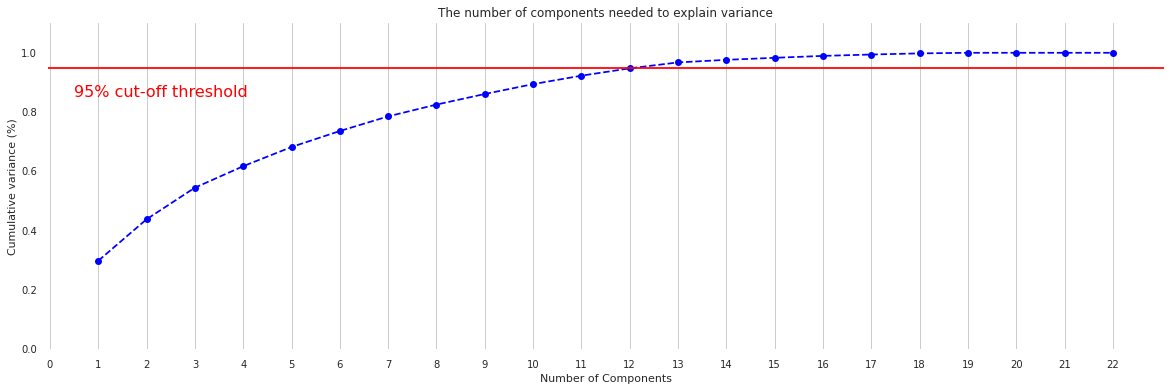

In [36]:
pca = PCA().fit(x_train)
plt.rcParams["figure.figsize"] = (20,6)

fig, ax = plt.subplots()
xi = np.arange(1, 23, step=1)
cumulative = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, cumulative, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 23, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

Here, to get 95% of variance explained, 12 principal components is chosen.

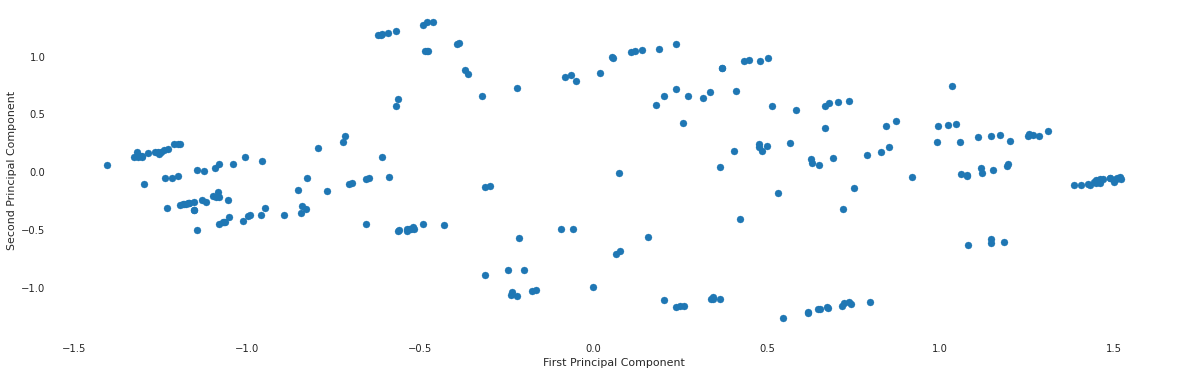

In [37]:
pca = PCA(n_components=12)
pca.fit(x_train)
reduced_data_train = pca.transform(x_train)
plt.scatter(reduced_data_train[:, 0], reduced_data_train[:, 1], label='Reduced')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

Create dictionary for storing accuracy for each different model

In [38]:
accuracies = {}

# Logistic Regression
Logistic Regression measures the relationship between categorical dependent variables (x) and one or more independent variables (y) by estimating probabilities using a logistic function, which is the cumulative logistic distribution.

Perform Logistic Regression

In [39]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
accuracy = lr.score(x_test, y_test)*100
accuracies['Logistic Regression'] = accuracy
print(f"Test Accuracy for Logistic Regression: {accuracy:.2f}%")

Test Accuracy for Logistic Regression: 85.25%


# K-Nearest Neighbor (kNN)
k-Nearest Neighbors algorithm (kNN) is a non-parametric method used for classification and regression. A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors.

Plot graph to see which optimal k values should be used in the model to obtain the highest accuracy

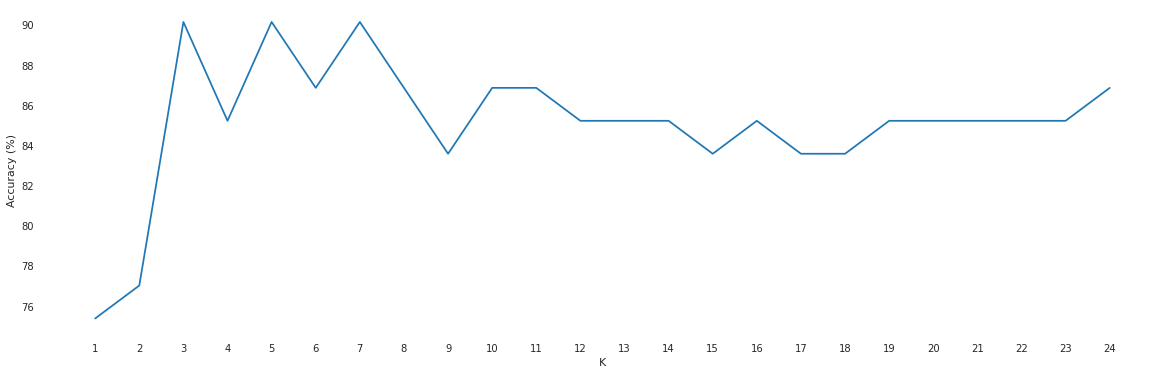

In [40]:
acc_list = []
y_labs = range(1, 25)
for i in y_labs:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    acc_list.append(knn.score(x_test, y_test)*100)
plt.plot(y_labs, acc_list)
plt.xticks(np.arange(1, 25, 1))
plt.xlabel("K")
plt.ylabel("Accuracy (%)")
plt.show()

Here, we could see that k at 3, 5 and 7 the accuracy is the highest.

In [41]:
accuracy = max(acc_list)
accuracies['kNN'] = accuracy
print(f"Test Accuracy for K-Nearest Neighbor classification: {accuracy:.2f}%")

Test Accuracy for K-Nearest Neighbor classification: 90.16%


# Support Vector Machine (SVM)
Support Vector Machine are supervised learning models with associated learning algorithm that analyze data used for classification and regression analysis. Given a set of training samples, each marked as belonging to one or the other two categories, SVM algorithm builds a model that assigns new test samples to one category or the other, making it a non-probabilistic binary linear classifier.

In [42]:
svm = SVC(random_state = 1)
svm.fit(x_train, y_train)
accuracy = svm.score(x_test, y_test)*100
accuracies['SVM'] = accuracy
print(f"Test Accuracy for SVM algorithm: {accuracy:.2f}%")

Test Accuracy for SVM algorithm: 86.89%


# Naive Bayes Algorithm
Navie Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes's theorem with strong (naive) independence assumptions between the features. Navie Bayes classifiers are highly scalable requring a number of parameters linear in the number of variables (features) in a learning problem. 

In [43]:
nb = GaussianNB()
nb.fit(x_train, y_train)
accuracy = nb.score(x_test,y_test)*100
accuracies['Naive Bayes'] = accuracy
print(f"Test Accuracy for Naive Bayes algorithm: {accuracy:.2f}%")

Test Accuracy for Naive Bayes algorithm: 85.25%


# Decision Tree Algorithm

In [44]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
accuracy = dt.score(x_test, y_test)*100
accuracies['Decision Tree'] = accuracy
print(f"Test Accuracy for Decision Tree algorithm: {accuracy:.2f}%")

Test Accuracy for Decision Tree algorithm: 78.69%


# Random Forest Classification

In [45]:
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train, y_train)
accuracy = rf.score(x_test,y_test)*100
accuracies['Random Forest'] = accuracy
print(f"Test Accuracy for Random Forest algorithm: {accuracy:.2f}%")

Test Accuracy for Random Forest algorithm: 88.52%


# Gradient Boosting Machine
Gradient boosting builds an additive model in a forward stage-wise way, which allows for the optimization of arbitrary differentiable loss functions. In each stage, nclasses regression trees are fit on the negative gradient of the binomial or multinomial deviance loss function.  the features are always randomly permuted at each split, therefore, the best found split may vary, even with the same training data and max_features = n_features, if the improvement of the criterion is identical for several splits enumearted during the search of the best split.

In [46]:
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
accuracy = gb.score(x_test, y_test)*100
accuracies['Gradient Boosting'] = accuracy
print(f"Test Accuracy for Gradient Boosting: {accuracy:.2f}%")

Test Accuracy for Gradient Boosting: 83.61%


# Perceptron
Perceptron is an algorithm for supervised learning binary classifiers (functions that can decide if the input belongs to some specific class or not). It is a type of linear classifier that makes its prediction based on a linear predictor function combining a set of weights with the feature vector.

In [47]:
pctr = Perceptron()
pctr.fit(x_train, y_train)
accuracy = pctr.score(x_test, y_test)*100
accuracies['Perceptron'] = accuracy
print(f"Test Accuracy for Perceptron: {accuracy:.2f}%")

Test Accuracy for Perceptron: 86.89%


# Stochastic Gradient Descent
Stochastic gradient descent (SGD) is an iterative method for optimizing an objective function with suitable smoothness properties. It can be regarded as a stochastic approximation of gradient descent optimization, since it replaces the actual gradient by an estimate thereof (calculated from randomly selected subset of the data). When dealing with big-data applications, this helps to reduce the computational burden, thus achieving faster iterations in trade for a slightly lower converence rate.

In [48]:
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
accuracy = sgd.score(x_test, y_test)*100
accuracies['SGD'] = accuracy
print(f"Test Accuracy for Stochastic Gradient Descent: {accuracy:.2f}%")

Test Accuracy for Stochastic Gradient Descent: 77.05%


# Model Comparison

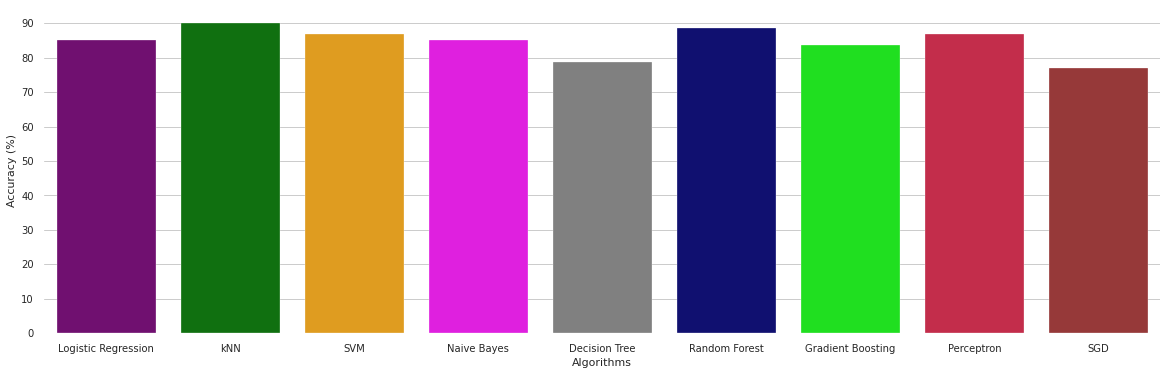

In [49]:
colors = ["purple", "green", "orange", "magenta","grey", "navy", "lime", "crimson", "brown"]
sns.set_style("whitegrid")
plt.figure(figsize=(20,6))
plt.yticks(np.arange(0, 100, 10))
plt.ylabel("Accuracy (%)")
plt.xlabel("Algorithms")
g = sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

Here, we could see that kNN has the highest accuracy of 90.16%.

# Confusion Matrix

Obtaining predicted values for each different model

In [50]:
y_lr = lr.predict(x_test)
knn_fin = KNeighborsClassifier(n_neighbors=3)
knn_fin.fit(x_train, y_train)
y_knn = knn_fin.predict(x_test)
y_svm = svm.predict(x_test)
y_nb = nb.predict(x_test)
y_dt = dt.predict(x_test)
y_rf = rf.predict(x_test)
y_gb = gb.predict(x_test)
y_pctr = pctr.predict(x_test)
y_sgd = sgd.predict(x_test)

Creating confusion matrixes based on the predicted values

In [51]:
cm_lr = confusion_matrix(y_test,y_lr)
cm_knn = confusion_matrix(y_test,y_knn)
cm_svm = confusion_matrix(y_test,y_svm)
cm_nb = confusion_matrix(y_test,y_nb)
cm_dt = confusion_matrix(y_test,y_dt)
cm_rf = confusion_matrix(y_test,y_rf)
cm_gb = confusion_matrix(y_test,y_gb)
cm_pctr = confusion_matrix(y_test,y_pctr)
cm_sgd = confusion_matrix(y_test,y_sgd)

Plotting these confusion matrixes

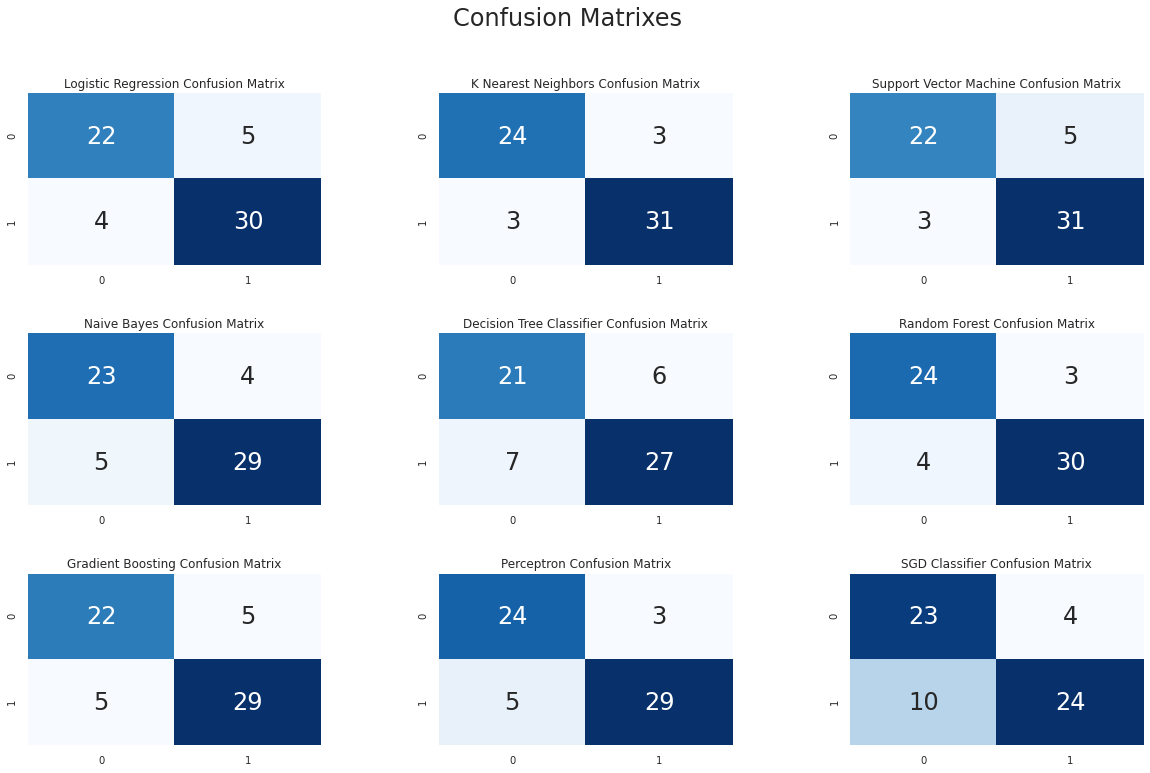

In [52]:
plt.figure(figsize=(20,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(3,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dt,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,7)
plt.title("Gradient Boosting Confusion Matrix")
sns.heatmap(cm_gb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,8)
plt.title("Perceptron Confusion Matrix")
sns.heatmap(cm_pctr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,9)
plt.title("SGD Classifier Confusion Matrix")
sns.heatmap(cm_sgd,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

Here, we could see that kNN and random forest have the least error in false negative and false positive. And that decision tree classifier has the poorest performance.